# Task 1: Iris Flowers Classification using Machine Learning

# 

#  

# 

## 

## 

## Importing the relevant libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

## Importing the Iris Dataset

In [2]:
data = pd.read_csv('Iris.csv')
iris_data = data.copy()
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris_data.shape

(150, 6)

In [5]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [7]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Checking for null values in the dataset

In [8]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Checking for duplicate data if any

In [9]:
iris_data[iris_data.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


## Dropping the "ID" column as it is not required

In [10]:
iris_data.drop(columns='Id',inplace=True)

## Renaming some of the columns

In [11]:
iris_data.rename(columns={'SepalLengthCm': 'Sepal Length','SepalWidthCm': 'Sepal Width','PetalLengthCm': 'Petal Length','PetalWidthCm': 'Petal Width'},inplace=True)

In [12]:
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Visualization

<AxesSubplot:>

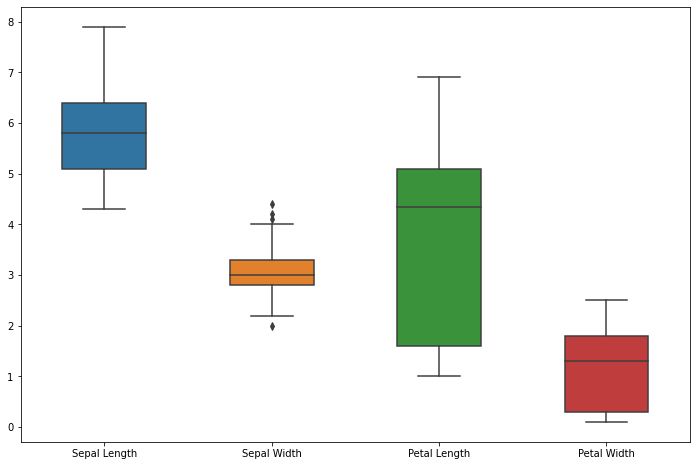

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(data = iris_data, width= 0.5, fliersize = 5)

## Exploring the correlation between different columns

In [14]:
iris_data.corr(method='pearson')

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

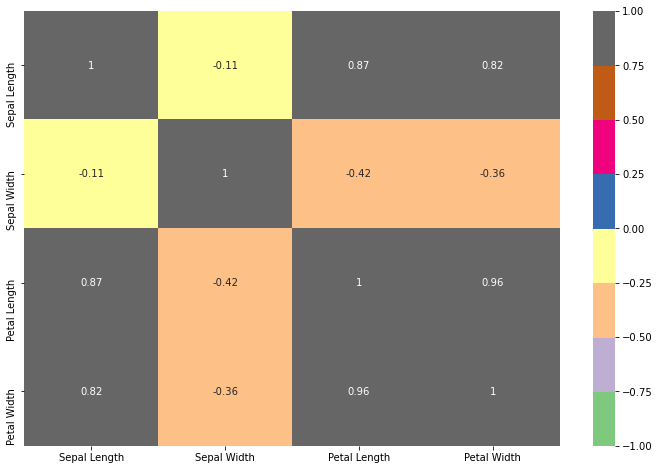

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(iris_data.corr(),annot=True,cmap='Accent',vmin=-1,vmax=1)

### Violin Plots

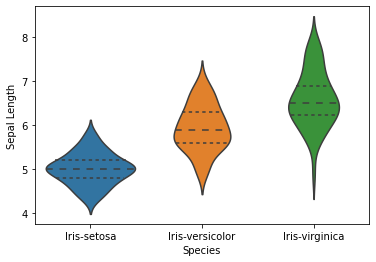

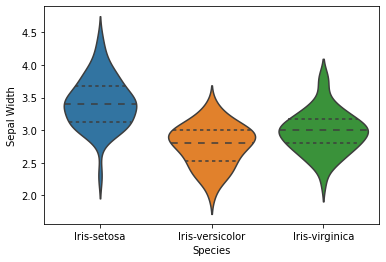

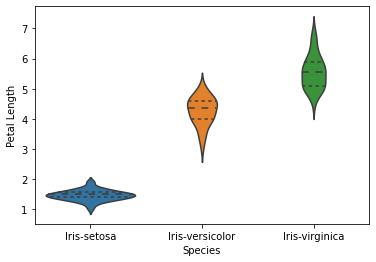

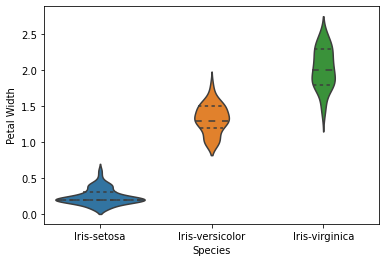

In [16]:
for col in iris_data.columns[:4]:
    sns.violinplot(x='Species',y=col,data=iris_data,inner='quartile')
    plt.show()

## Pair Plot

<Figure size 1440x720 with 0 Axes>

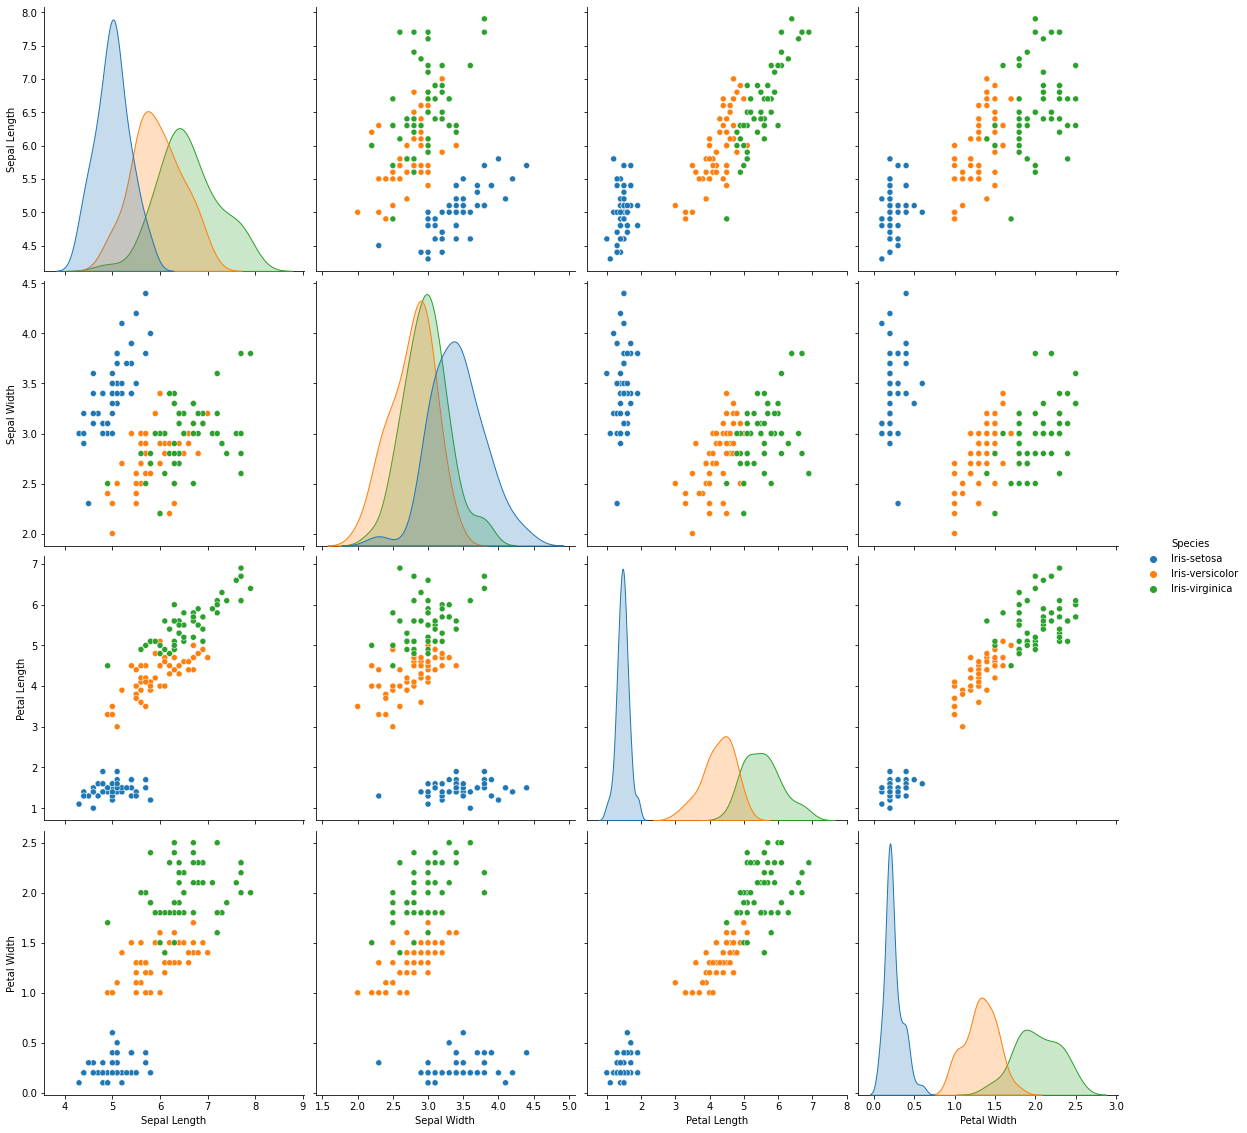

In [17]:
plt.figure(figsize=(20,10))
sns.pairplot(iris_data,hue='Species',height=4)
plt.show()

### Histograms

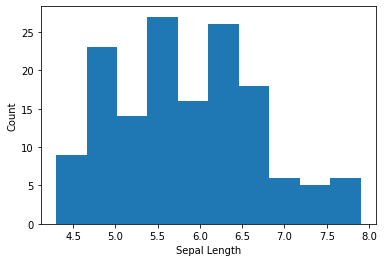

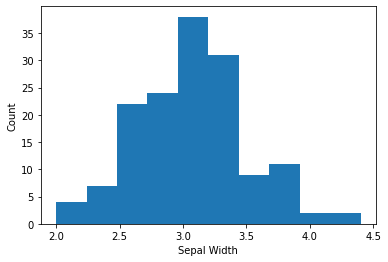

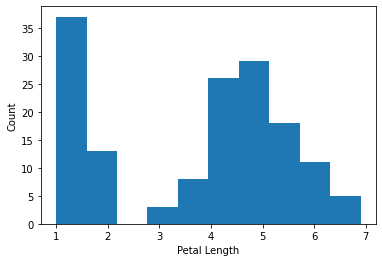

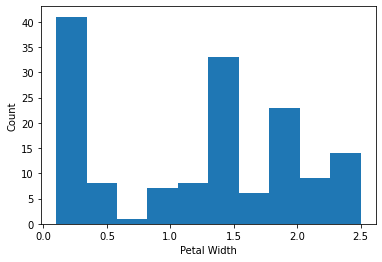

In [18]:
for col in iris_data.columns[:4]:
    plt.hist(iris_data[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Plotting a pie chart for 'Species' column

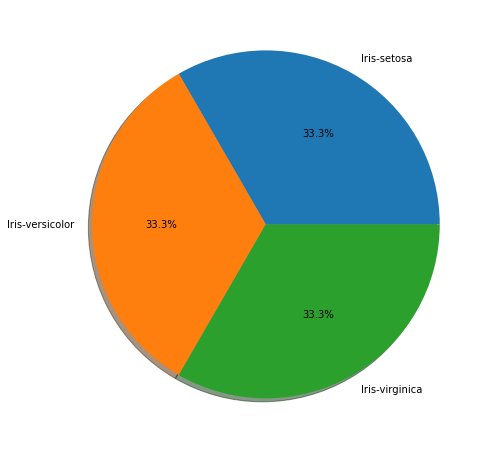

In [19]:
plt.figure(figsize=(8,8))
plt.pie(iris_data['Species'].value_counts().values,labels=iris_data['Species'].value_counts().keys(),shadow=True,autopct='%1.1f%%')
plt.show()

### Matrix Scatterplot

array([[<AxesSubplot:xlabel='Sepal Length', ylabel='Sepal Length'>,
        <AxesSubplot:xlabel='Sepal Width', ylabel='Sepal Length'>,
        <AxesSubplot:xlabel='Petal Length', ylabel='Sepal Length'>,
        <AxesSubplot:xlabel='Petal Width', ylabel='Sepal Length'>],
       [<AxesSubplot:xlabel='Sepal Length', ylabel='Sepal Width'>,
        <AxesSubplot:xlabel='Sepal Width', ylabel='Sepal Width'>,
        <AxesSubplot:xlabel='Petal Length', ylabel='Sepal Width'>,
        <AxesSubplot:xlabel='Petal Width', ylabel='Sepal Width'>],
       [<AxesSubplot:xlabel='Sepal Length', ylabel='Petal Length'>,
        <AxesSubplot:xlabel='Sepal Width', ylabel='Petal Length'>,
        <AxesSubplot:xlabel='Petal Length', ylabel='Petal Length'>,
        <AxesSubplot:xlabel='Petal Width', ylabel='Petal Length'>],
       [<AxesSubplot:xlabel='Sepal Length', ylabel='Petal Width'>,
        <AxesSubplot:xlabel='Sepal Width', ylabel='Petal Width'>,
        <AxesSubplot:xlabel='Petal Length', ylabel='Petal 

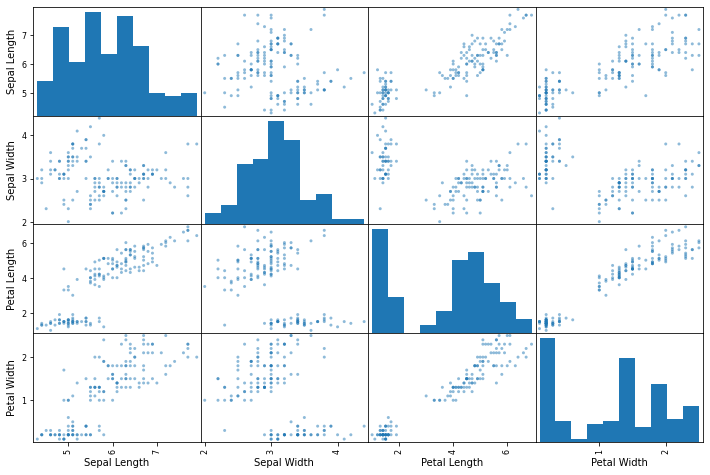

In [20]:
pd.plotting.scatter_matrix(iris_data,figsize=(12,8))

In [21]:
def plot_cat(a):
    fig,axes=plt.subplots(2,2,figsize=(10,12))
    iris_data[a].value_counts().plot.pie(colors=['#7fffd4','#00bfff','#000080'],labels=iris_data[a],shadow = True,
startangle = 180,autopct='%.0f%%',ax=axes[0][0])
    iris_data[a].value_counts().plot.bar(ax=axes[0][1])
    sns.scatterplot(x=iris_data['Petal Width'] ,y=iris_data['Sepal Width'],hue=iris_data[a],ax=axes[1][0],palette='Pastel1')
    sns.stripplot(x=iris_data[a],y=iris_data['Petal Width'],hue=iris_data['Sepal Width'],ax=axes[1][1],palette='Pastel1')
    fig.suptitle("Count of "+a.title())
    plt.show()

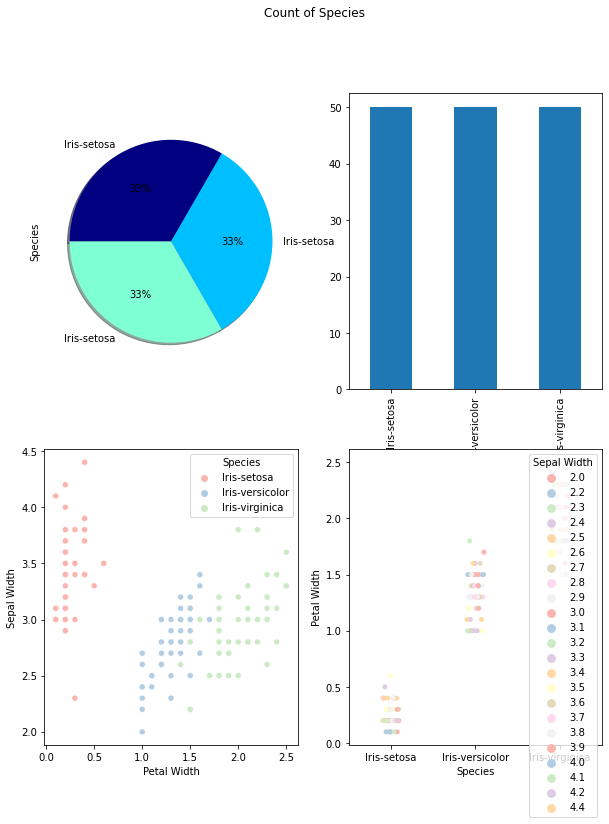

In [22]:
plot_cat('Species')

In [25]:
def plot_kde(a):
    facet=sns.FacetGrid(iris_data,hue='Species',aspect=4,palette='PuBu')
    facet.map(sns.kdeplot,a,shade=True)
    facet.set(xlim=(0,iris_data[a].max()))
    plt.title(a.title())
    plt.show()

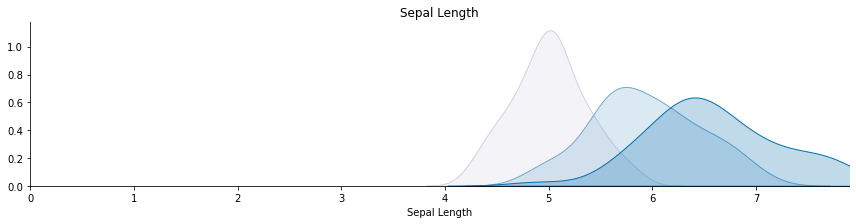

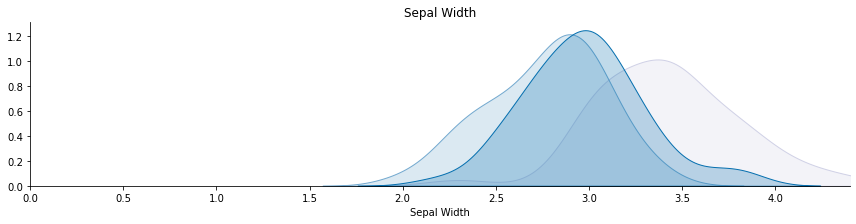

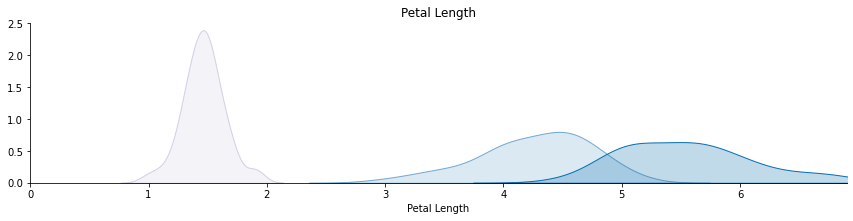

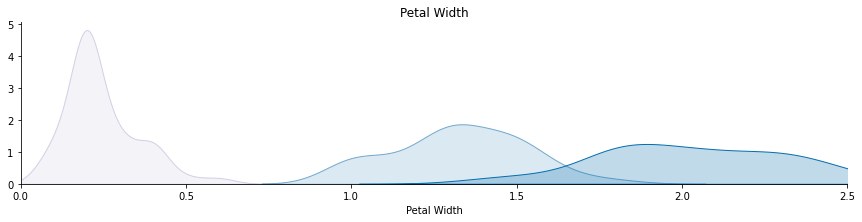

In [26]:
for col in iris_data.columns[:4]:
    plot_kde(col)

## Training the Model

In [28]:
x = iris_data.drop(columns='Species',axis=1)
y = iris_data['Species']
x.head(), y.head()

(   Sepal Length  Sepal Width  Petal Length  Petal Width
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2
 3           4.6          3.1           1.5          0.2
 4           5.0          3.6           1.4          0.2,
 0    Iris-setosa
 1    Iris-setosa
 2    Iris-setosa
 3    Iris-setosa
 4    Iris-setosa
 Name: Species, dtype: object)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=1)

## Selecting the models and metrics (Supervised ML Models)

In [34]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

## Prediction and performance metrics

In [42]:
models = [lr,knn,svm,nb,dt,rf]
scores = []

for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
    print("Accuracy of " + type(model).__name__ + " is", np.round(accuracy_score(y_test, y_pred),3))
    print("Confusion Matrix of " + type(model).__name__ + " : ")
    print(confusion_matrix(y_test,y_pred))
    print("Classification Report of " + type(model).__name__ + " : ")
    print(classification_report(y_test,y_pred))
    print('----------')

Accuracy of LogisticRegression is 0.967
Confusion Matrix of LogisticRegression : 
[[19  0  0]
 [ 0 20  1]
 [ 0  1 19]]
Classification Report of LogisticRegression : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.95      0.95      0.95        21
 Iris-virginica       0.95      0.95      0.95        20

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60

----------
Accuracy of KNeighborsClassifier is 0.983
Confusion Matrix of KNeighborsClassifier : 
[[19  0  0]
 [ 0 21  0]
 [ 0  1 19]]
Classification Report of KNeighborsClassifier : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.95      1.00      0.98        21
 Iris-virginica       1.00      0.95      0.97        20

       accuracy    

In [37]:
results = pd.DataFrame({
    'Models': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes', 'Decision Tree', 
               'Random Forest'],'Accuracy': scores})

results = results.sort_values(by='Accuracy', ascending=False)
print(results)

                   Models  Accuracy
1     K-Nearest Neighbors  0.983333
2  Support Vector Machine  0.983333
0     Logistic Regression  0.966667
4           Decision Tree  0.966667
5           Random Forest  0.966667
3             Naive Bayes  0.950000


### K-Nearest Neighbors and Support Vector Machine models have predicted the result to a high level of accuracy, while Naive Bayes has predicted to the least level of accuracy.

# THANK YOU